### <font color = "green"> Content </font>
1. [Setup](#Setup)
2. [Get the data](#getdata)
3. [DataStructure of CSV](#DSC)
4. [Create a test set](#CTS)
5. [Preparing data for ML](#PML)
6. [Data Cleaning](#data_cleaning)
7. [Handling Text and Categorical Data](#HTCD)
8. [Custom Transformation](#CT)
9. [Transformation Pipeline](#TP)
10. [Select and Train a Model](#STM)
11. [Better Evaluation Using Cross Validation](#BECV)
12. [Fine Tune The Model](#FTM)
<br>12.1 [Grid Search](#GS)
<br>12.2 [Randomized Search](#RS)
13. [Anlyse The Best Model And Their Error](#ATM)
14. [Evaluate The System On Test Set](#EST)

### <a class = "house" id ="Setup"><font color = "red">Setup</font></a>

In [95]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import warnings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
mpl.rc('axes' , labelsize=14)
mpl.rc('xtick' , labelsize=12)
mpl.rc('ytick' , labelsize=12)


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR , "images" , CHAPTER_ID)
os.makedirs(IMAGES_PATH , exist_ok = True)

def save_fig(fig_id , tight_layout = True , fig_extension = 'png', resolution = 300):
    path = os.path.join(IMAGES_PATH,fig_id+"."+fig_extension)
    print("Saving figure" , fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path , extension = fig_extension , dpi = resolution)

### <a class = "hosuse" id ="getdata"><font color = "red">Get the data</font></a>

In [96]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [97]:
fetch_housing_data()

In [98]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


### <a class = "hosuse" id ="DSC"><font color = "red">Looking at Data Structure of House CSV</font></a>

In [99]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [101]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [102]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Saving figure attribute_histogram_plots


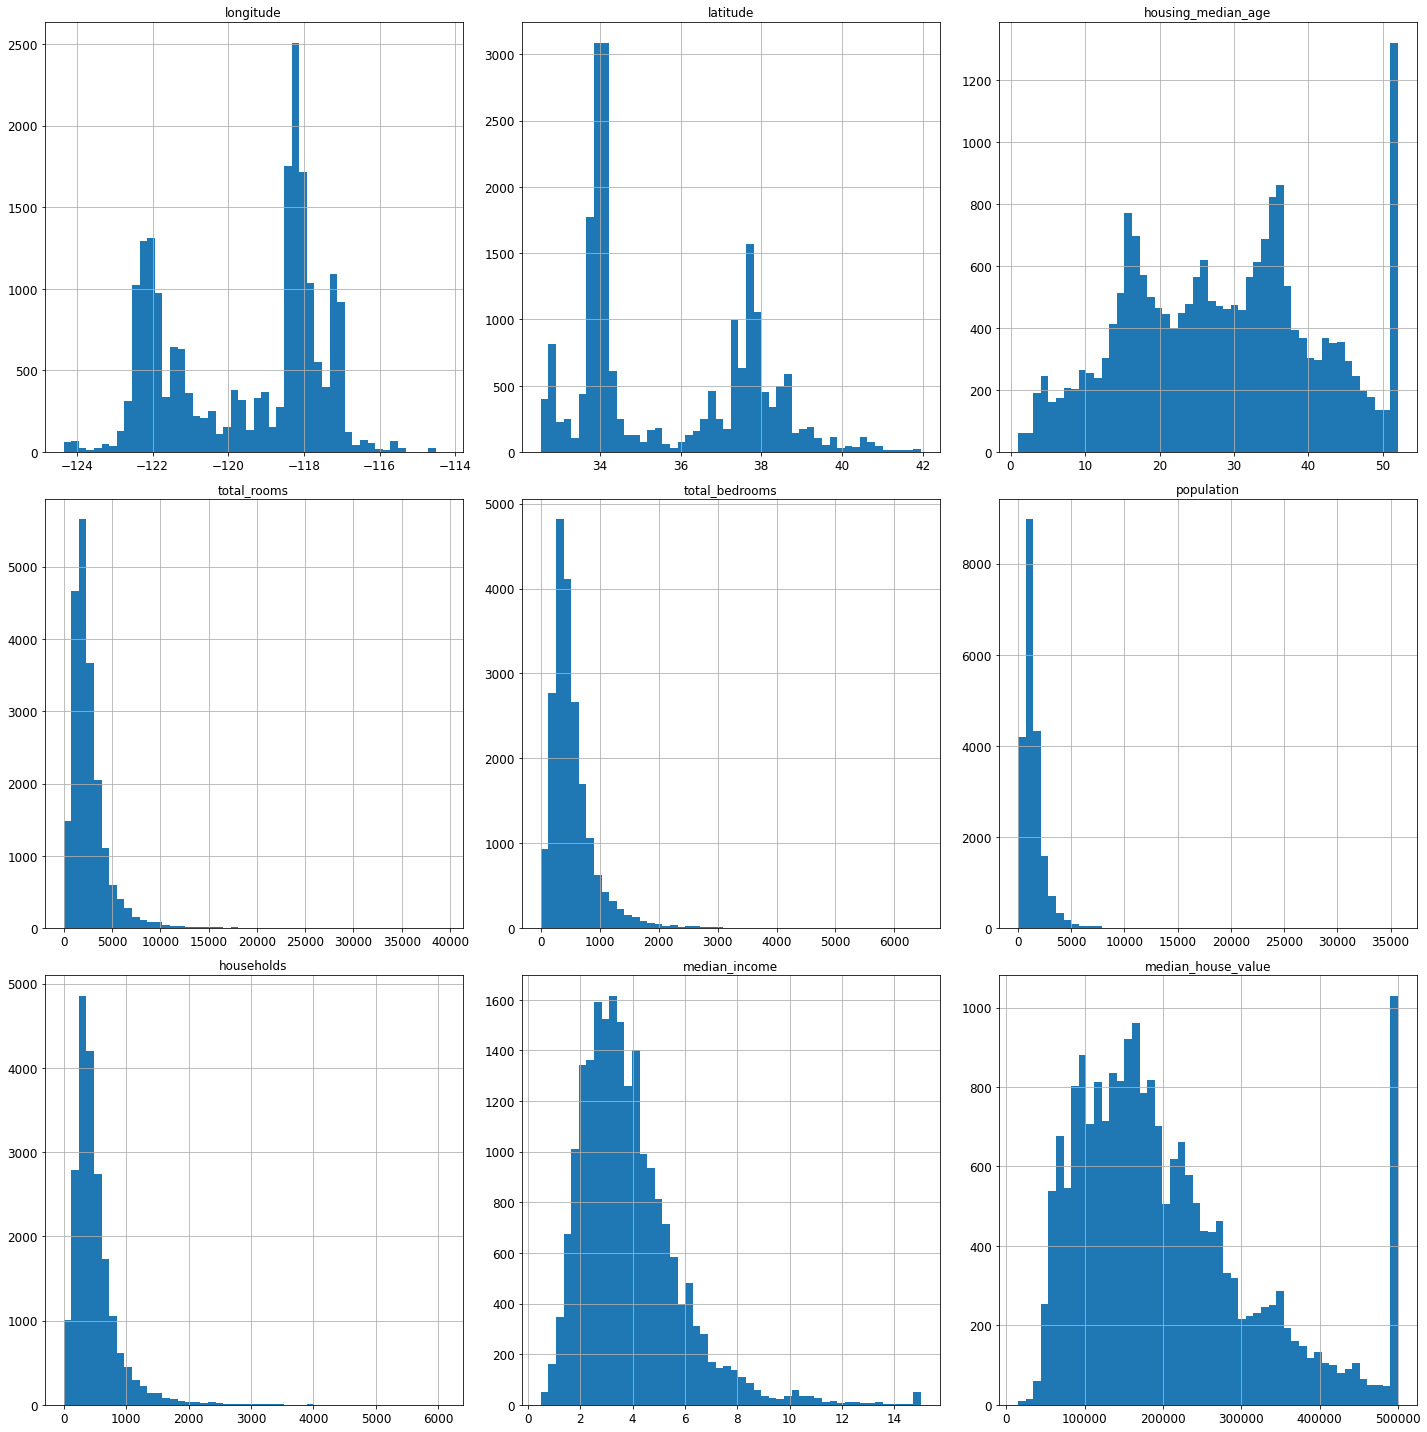

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50 , figsize= (20 ,20))
save_fig("attribute_histogram_plots")
plt.show()

## <a class = "hosuse" id ="CTS"><font color = "red">Create a test set</font></a>

In [104]:
# To make the output of this notebook constanct number each time
np.random.seed(42)

In [105]:
def split_train_test(data , test_ratio):
    shuffled_indixes = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indicex = shuffled_indixes[:test_set_size]
    train_indicex = shuffled_indixes[test_set_size : ]
    return data.iloc[train_indicex] , data.iloc[test_indicex]

In [106]:
train_set , test_set = split_train_test(housing , 0.2)

In [107]:
len(train_set) , len(test_set)

(16512, 4128)

In [108]:
from zlib import crc32

def test_set_check(identifier , test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data , test_ratio , id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_ , test_ratio))
    return data.loc[~in_test_set] , data.loc[in_test_set]

In [109]:
housing_with_id = housing.reset_index()
train_set , test_set = split_train_test_by_id(housing_with_id , 0.2 , "index")

In [110]:
housing_with_id['id'] = housing['longitude']*1000 + housing['latitude']
train_set , test_set = split_train_test_by_id(housing_with_id , 0.2 , 'id')

In [111]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


<AxesSubplot:>

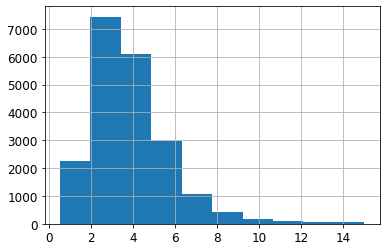

In [112]:
housing['median_income'].hist()

In [113]:
housing['income_cat'] = pd.cut(housing['median_income'] , bins=[0., 1.5 , 3., 4.5 , 6. , np.inf],
                              labels = [1 , 2, 3, 4, 5])

In [114]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

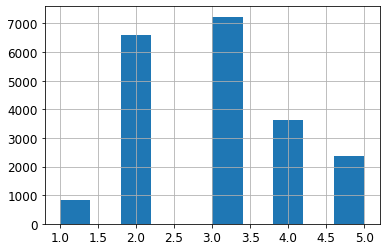

In [115]:
housing['income_cat'].hist()

In [116]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2,  random_state = 42)

for train_index , test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [117]:
strat_test_set['income_cat'].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [118]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [119]:
from sklearn.model_selection import train_test_split
def income_cat_prop(data):
    return data['income_cat'].value_counts() / len(data)

train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)

compare_props = pd.DataFrame({
    'Actual' : income_cat_prop(housing),
    'Stratified' : income_cat_prop(strat_test_set),
    'Random' : income_cat_prop(test_set)
}).sort_index()

compare_props['Stratified % error'] = 100 * compare_props['Stratified'] / compare_props['Actual'] - 100
compare_props['Random % error'] = 100 * compare_props['Random'] / compare_props['Actual'] - 100

compare_props

,Actual,Stratified,Random,Stratified % error,Random % error
1,0.039826,0.039729,0.040213,-0.243309,0.973236
2,0.318847,0.318798,0.324370,-0.015195,1.732260
3,0.350581,0.350533,0.358527,-0.013820,2.266446
4,0.176308,0.176357,0.167393,0.027480,-5.056334
5,0.114438,0.114583,0.109496,0.127011,-4.318374


In [120]:
for s in (strat_train_set , strat_test_set):
    s.drop("income_cat" , axis = 1 ,  inplace = True)

In [121]:
housing = strat_train_set.copy()

In [122]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

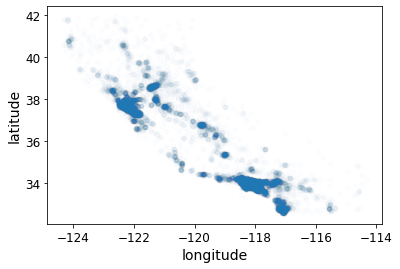

In [123]:
housing.plot(kind = "scatter", x = "longitude" , y = "latitude" , alpha = 0.01)

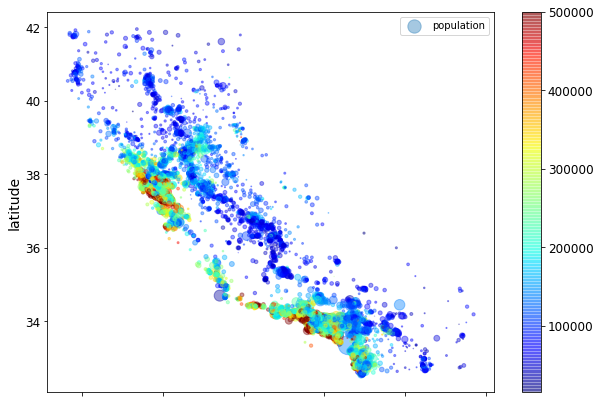

In [124]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4,
            s = housing["population"]/100, #reresent the size where radius is the population density
            label = "population",figsize = (10,7),
            c = housing["median_house_value"] , cmap=plt.get_cmap("jet"),
            colorbar = True,
            )
plt.legend()

In [125]:
corr_matrix = housing.corr()

In [126]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:>

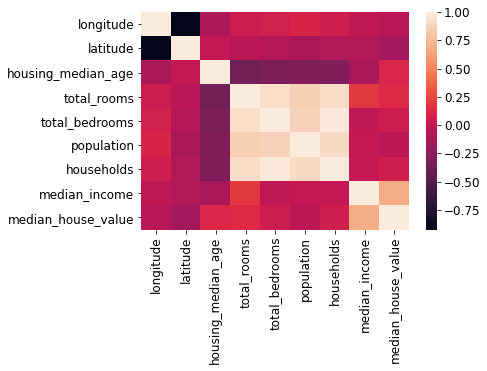

In [127]:
sns.heatmap(corr_matrix)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

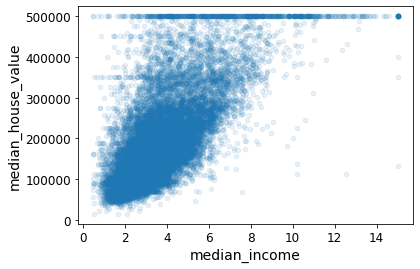

In [128]:
housing.plot(kind = "scatter" , x = "median_income" , y = "median_house_value" , alpha = 0.1)

In [129]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [130]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

In [131]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN



### <a class = "house" id="PML"><font color = 'red'>Preparing data for ML</font></a>

In [132]:
housing = strat_train_set.drop("median_house_value" , axis = 1)
housing_labels = strat_train_set["median_house_value"]

### <a class = "house" id="data_cleaning"><font color = 'red'>Data Cleaning </font></a>

In [133]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN


In [134]:
sample_incomplete_rows.drop("total_bedrooms" , axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN


In [135]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median , inplace = True)

In [136]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036,<1H OCEAN
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347,INLAND
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073,NEAR OCEAN


In [137]:
from sklearn.impute import SimpleImputer
smp = SimpleImputer(strategy = "median")

In [138]:
housing_num = housing.drop("ocean_proximity" , axis = 1)

In [139]:
smp.fit(housing_num)

SimpleImputer(strategy='median')

In [140]:
smp.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [141]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [142]:
X = smp.transform(housing_num)

housing_tr = pd.DataFrame(X , columns = housing_num.columns , index = housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073


In [143]:
smp.strategy

'median'

In [144]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347



### <a class = "house" id="HTCD"><font color = 'red'>Handling Text and Categorical Data </font></a>

In [145]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [146]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [147]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)
housing_cat_encoder = one_hot_encoder.fit_transform(housing_cat)
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]


### <a class = "house" id="CT"><font color = 'red'> Custom Transformation</font></a>

In [148]:
from sklearn.base import BaseEstimator , TransformerMixin

col_names = "total_rooms" , "total_bedrooms" , "population" , "households"
room_ix , bedrooms_ix , population_ix , household_ix = [housing.columns.get_loc(c) for c in col_names]

class CombinedAttribute(BaseEstimator , TransformerMixin):
    def __init__(self , add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self , X , y = None):
        return self
    def transform(self , X):
        rooms_per_household= X[:, room_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix]/X[: , household_ix]
        if(self.add_bedrooms_per_room):
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household , population_per_household , bedrooms_per_room]
        else:
            return np.c_[X , rooms_per_household , population_per_household]
        
attr_adder = CombinedAttribute(add_bedrooms_per_room=False)
housing_attr_adder = attr_adder.transform(housing.values)

In [149]:
housing_extra_attribute = pd.DataFrame(
    housing_attr_adder,
    columns = list(housing.columns) + ["rooms_per_household" , "population_per_household"],
    index = housing.index
)
housing_extra_attribute.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847



### <a class = "house" id="TP"><font color = 'red'>Transformer Pipeline</font></a>

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

new_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy="median")),
    ("attribs_adder" , CombinedAttribute()),
    ("std_scaler" , StandardScaler())
])

housing_num_tr = new_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [151]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num" , new_pipeline , num_attribs),
    ("cat" , OneHotEncoder() , cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

class OldDataFrame(BaseEstimator , TransformerMixin):
    def __init__(self , attribute):
        self.attribute = attribute
    def fit(self , X , y = None):
        return self
    def transform(self , X):
        return X[self.attribute].values
    
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

old_num_pipeline = Pipeline([
    ("selector" , OldDataFrame(num_attribs)),
    ("imputer" , SimpleImputer(strategy="median")),
    ("attribs_adder" , CombinedAttribute()),
    ("scaler" , StandardScaler())
])

old_cat_pipeline = Pipeline([
    ("selector" , OldDataFrame(cat_attribs)),
    ("encoder" , OneHotEncoder(sparse = False))
])

old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline" , old_num_pipeline),
    ("cat_pipeline" , old_cat_pipeline)
])

old_house_prepared = old_full_pipeline.fit_transform(housing)

print(old_house_prepared)

np.allclose(housing_prepared , old_house_prepared)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]


True


### <a class = "house" id="STM"><font color = 'red'>Select And Train a Model</font></a>

In [153]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [154]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# print(housing_prepared.shape , some_data_prepared.shape , some_data.shape,housing.shape)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [155]:
from sklearn.metrics import mean_squared_error

housing_prediction  = lin_reg.predict(housing_prepared)
lin_mse = np.sqrt(mean_squared_error(housing_labels , housing_prediction))
lin_mse

68628.19819848922

In [156]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels , housing_prediction)
lin_mae

49439.89599001897

In [157]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared , housing_labels)

DecisionTreeRegressor(random_state=42)

In [158]:
decision_tree_labels = tree_reg.predict(housing_prepared)
tree_mse = np.sqrt(mean_squared_error(housing_labels, decision_tree_labels))
tree_mse

0.0

### <a class = "house" id="BECV"><font color = 'red'>Better Evaluation Using Cross-Validation</font></a>

In [159]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg , housing_prepared , housing_labels , scoring = 'neg_mean_squared_error' , cv = 10)

tree_rmse_error = np.sqrt(-scores)

In [160]:
def display_score(scores):
    print("Score :",scores)
    print("Mean :",scores.mean())
    print("Standard deviation :" , scores.std())
display_score(tree_rmse_error)

Score : [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean : 71407.68766037929
Standard deviation : 2439.4345041191004


In [161]:
lin_scores = cross_val_score(lin_reg , housing_prepared , housing_labels, scoring='neg_mean_squared_error' ,cv = 10)
lin_error = np.sqrt(-lin_scores)
display_score(lin_error)

Score : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean : 69052.46136345083
Standard deviation : 2731.674001798347


In [162]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100 , random_state = 42)
forest_reg.fit(housing_prepared , housing_labels)
random_forest_labels = forest_reg.predict(housing_prepared)

random_forest_error = mean_squared_error(random_forest_labels , housing_labels)
ranndom_forest_rmse = np.sqrt(random_forest_error)

In [163]:
forest_score = cross_val_score(forest_reg , housing_prepared , housing_labels , scoring = 'neg_mean_squared_error', cv = 10)

forest_error = np.sqrt(-forest_score)
display_score(forest_error)

Score : [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean : 50182.303100336096
Standard deviation : 2097.0810550985693


In [164]:
pd.Series(np.sqrt(-forest_score)).describe()

count       10.000000
mean     50182.303100
std       2210.517524
min      47461.911582
25%      48803.201309
50%      49770.694467
75%      51751.217424
max      53490.106998
dtype: float64

In [165]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = "linear")
svm_reg.fit(housing_prepared , housing_labels)
svm_housing_labels = svm_reg.predict(housing_prepared)
scores = mean_squared_error(svm_housing_labels , housing_labels)
svm_rmse = np.sqrt(scores)
svm_rmse

111094.6308539982

# <a class = "house" id="FTM"><font color = 'Green'>Fine Tune The Model</font></a>


### <a class = "house" id="GS"><font color = 'red'>Grid Search</font></a>

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10 ,30] , 'max_features' : [2,4,6,8]},
    {'bootstrap' : [False] , 'n_estimators' : [3,10] , 'max_features':[2,5,6]}
]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg , param_grid , scoring = 'neg_mean_squared_error' , return_train_score = True )

grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 5, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [167]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [168]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [169]:
# Score of each hyperparameter tested during grid search

cvres = grid_search.cv_results_
for mean, params in zip(cvres['mean_test_score'] , cvres['params']):
    print(np.sqrt(-mean) , params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59188.88609748348 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
52086.800046571305 {'bootstrap': False, 'max_features': 5, 'n_estimator

In [170]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052660,0.002309,0.002991,7.776979e-07,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.168955,0.001034,0.007979,4.909339e-07,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.505037,0.003702,0.021941,6.308266e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.083377,0.001493,0.002992,1.168008e-07,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.269679,0.002927,0.008179,3.987094e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.821984,0.025246,0.024131,3.898479e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.111315,0.002781,0.002992,9.368364e-07,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.385562,0.022339,0.009974,3.512009e-03,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.112611,0.002734,0.022148,7.536772e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.148197,0.004254,0.002798,4.025459e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


### <a class = "house" id="RS"><font color = 'red'>Randomized Search</font></a>

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(low = 1 , high = 200),
    'max_features' : randint(low = 1 , high = 8)
}

forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg , param_dist , n_iter = 10 , cv = 5 ,scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(housing_prepared , housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD337E2880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD3B165760>},
                   random_state=42, scoring='neg_mean_squared_error')

In [173]:
cvres = rnd_search.cv_results_
for mean , params in zip(cvres['mean_test_score'] , cvres['params']):
    print(np.sqrt(-mean) , params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}



### <a class = "house" id="ATM"><font color = 'red'>Analyze The Best Models And Their Errors </font></a>

In [179]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [187]:
extra_attribs = ['rooms_per_hhold' , 'pop_per_hhold' , 'bedrooms_per_room']

cat_encoder = full_pipeline.named_transformers_['cat']
cat_features = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_features
sorted(zip(feature_importance , attributes), reverse = True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]


### <a class = "house" id="EST"><font color = 'red'> Evaluate The System On Test Set </font></a>

In [192]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value' , axis = 1)
Y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction  = final_model.predict(X_test_prepared)

final_mse = np.sqrt(mean_squared_error(Y_test , final_prediction))
final_mse

47730.22690385927

Computing 95% rmse interval

In [198]:
from scipy import stats

confidence = 0.95
squared_error = (final_prediction - Y_test) ** 2
np.sqrt(stats.t.interval(confidence , len(squared_error) -1 , loc = squared_error.mean() , scale = stats.sem(squared_error)))

array([45685.10470776, 49691.25001878])

Computing interval manually

In [204]:
m = len(squared_error)
mean = squared_error.mean()
t_score = stats.t.ppf((1 + confidence) / 2 , df = m-1)
tmargin = t_score * squared_error.std(ddof = 1)/np.sqrt(m)
np.sqrt(mean - tmargin) , np.sqrt(mean+ tmargin)

(45685.10470776, 49691.25001877858)

Using Z-score rather than t-score

In [207]:
z_score = stats.norm.ppf((1+confidence) / 2)
z_margin = z_score * squared_error.std(ddof = 1) / np.sqrt(m)
np.sqrt(mean - z_margin) , np.sqrt(mean + z_margin)

(45685.717918136455, 49690.68623889413)